In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [9]:
insurance_data = pd.read_csv('./datasets/insurance.csv')

In [10]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance_data.shape

(1338, 7)

In [12]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\aadit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


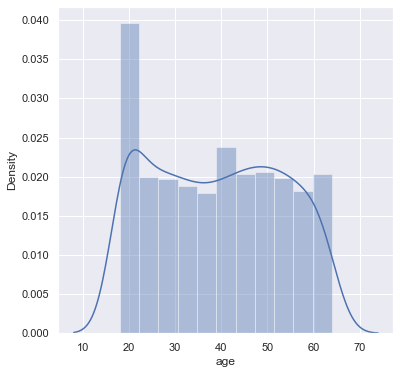

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title = 'Age Distribution'
plt.show()

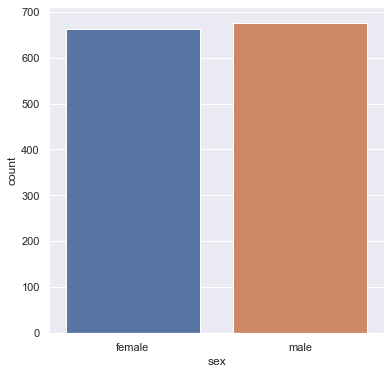

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title = 'Sex Distribution'
plt.show()


In [19]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\aadit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


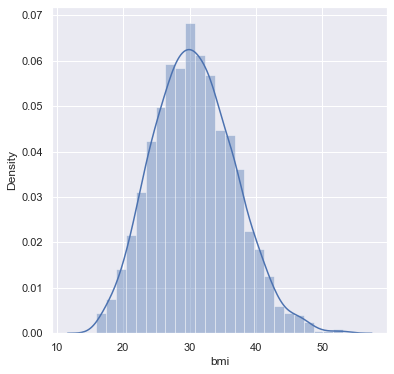

In [20]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title = 'BMI Distribution'
plt.show()

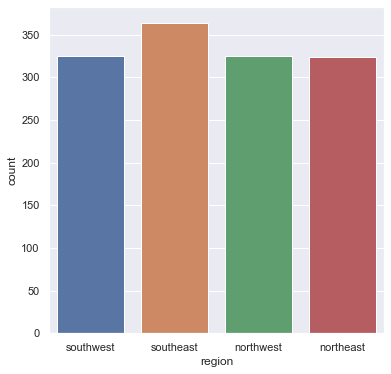

In [24]:
plt.figure(figsize=(6,6))
#sns.countplot(x='children',data=insurance_data)
#sns.countplot(x='smoker',data=insurance_data)
sns.countplot(x='region',data=insurance_data)
plt.title = 'Region Distribution'
plt.show()

C:\Users\aadit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


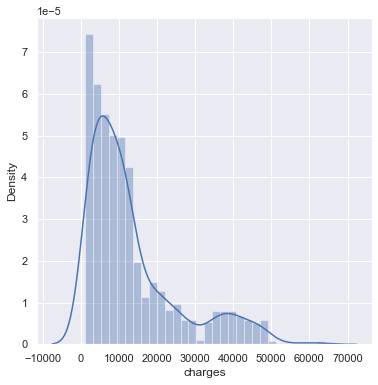

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title = 'Charges Distribution'
plt.show()

In [27]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)

In [29]:
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [30]:
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [31]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [32]:
x = insurance_data.drop(columns='charges',axis=1)
y = insurance_data['charges']

In [33]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [34]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
training_data_prediction = model.predict(x_train)
r2_train = metrics.r2_score(y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [42]:
testing_data_predicition = model.predict(x_test)
r2_test = metrics.r2_score(y_test,testing_data_predicition)
print(r2_test)

0.7447273869684077


In [44]:
#Predictive System
input_data = (31,1,25.74,0,1,0)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction[0])

3760.0805764960587


C:\Users\aadit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
